In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('training_set_VU_DM.csv')
print('loading the dataset, make sure it is in the same folder')

loading the dataset, make sure it is in the same folder


In [4]:
print('first 5 rows of the dataset')
df.head()

first 5 rows of the dataset


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [5]:
print('all column names')
for col in df.columns:
    print(col)

all column names
srch_id
date_time
site_id
visitor_location_country_id
visitor_hist_starrating
visitor_hist_adr_usd
prop_country_id
prop_id
prop_starrating
prop_review_score
prop_brand_bool
prop_location_score1
prop_location_score2
prop_log_historical_price
position
price_usd
promotion_flag
srch_destination_id
srch_length_of_stay
srch_booking_window
srch_adults_count
srch_children_count
srch_room_count
srch_saturday_night_bool
srch_query_affinity_score
orig_destination_distance
random_bool
comp1_rate
comp1_inv
comp1_rate_percent_diff
comp2_rate
comp2_inv
comp2_rate_percent_diff
comp3_rate
comp3_inv
comp3_rate_percent_diff
comp4_rate
comp4_inv
comp4_rate_percent_diff
comp5_rate
comp5_inv
comp5_rate_percent_diff
comp6_rate
comp6_inv
comp6_rate_percent_diff
comp7_rate
comp7_inv
comp7_rate_percent_diff
comp8_rate
comp8_inv
comp8_rate_percent_diff
click_bool
gross_bookings_usd
booking_bool


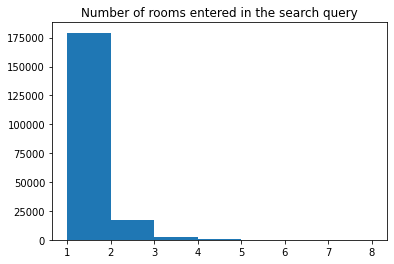

In [6]:
#Grouping the data per search query
search = df.groupby(['srch_id']).mean()
plt.hist(search['srch_room_count'], bins=7)
plt.title('Number of rooms entered in the search query')
plt.show()

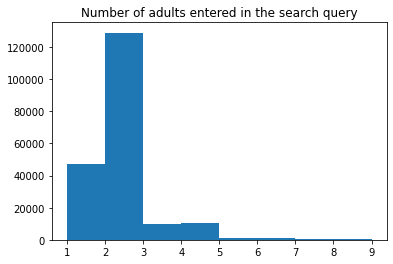

In [7]:
plt.hist(search['srch_adults_count'], bins=8)
plt.title('Number of adults entered in the search query')
plt.show()

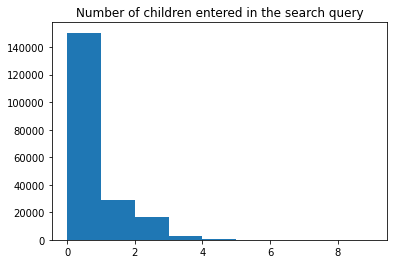

In [8]:
plt.hist(search['srch_children_count'], bins=9)
plt.title('Number of children entered in the search query')
plt.show()

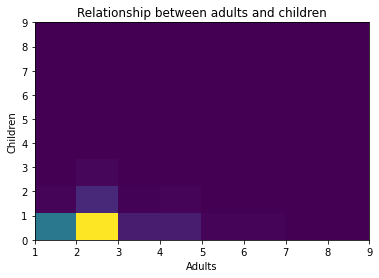

In [21]:
plt.hist2d(search['srch_adults_count'], search['srch_children_count'], bins=8)
plt.title('Relationship between adults and children')
plt.xlabel('Adults')
plt.ylabel('Children')
plt.show()

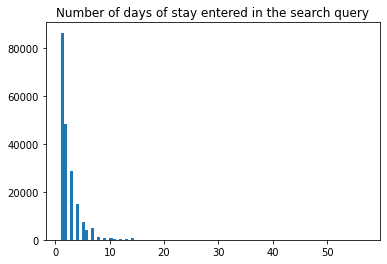

In [22]:
plt.hist(search['srch_length_of_stay'], bins = 100)
plt.title('Number of days of stay entered in the search query')
plt.show()

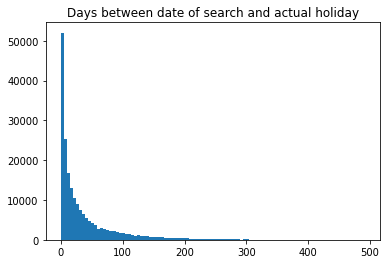

In [23]:
plt.hist(search['srch_booking_window'], bins=100)
plt.title('Days between date of search and actual holiday')
plt.show()

Text(0, 0.5, 'Count')

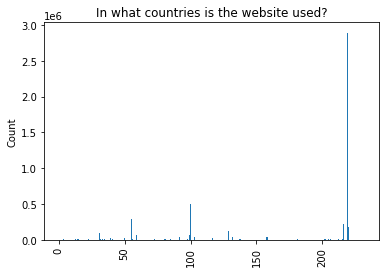

In [18]:
# Analysis of the country of user
country = df['visitor_location_country_id'].value_counts()
country = pd.DataFrame(country)
plt.bar(country.index, country['visitor_location_country_id'])
plt.xticks(rotation=90)
plt.title('In what countries is the website used?')
plt.ylabel('Count')

In [19]:
country_most = country[country['visitor_location_country_id'] > 100000]
print('Countries in which most searches are performed')
country_most

Text(0, 0.5, 'Count')

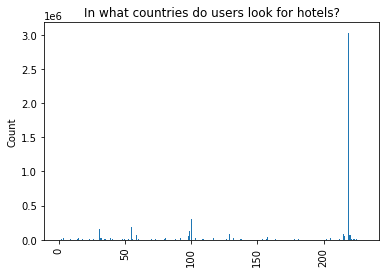

In [40]:
# Analysis of the country of visit
countryv = df['prop_country_id'].value_counts()
countryv = pd.DataFrame(countryv)
plt.bar(countryv.index, countryv['prop_country_id'])
plt.xticks(rotation=90)
plt.title('In what countries do users look for hotels?')
plt.ylabel('Count')

In [41]:
countryv_most = countryv[countryv['prop_country_id'] > 100000]
print('Countries in which most hotels are searched')
country_most

Countries in which most hotels are searched


,prop_country_id
219,3030125
100,311283
55,186465
31,154287
99,135388


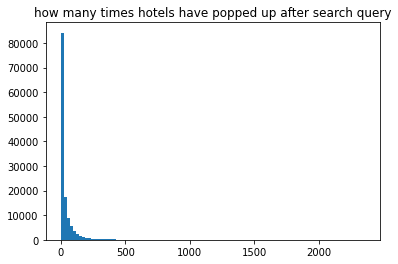

In [55]:
hotels = df.groupby(['prop_id']).count()
plt.hist(hotels['srch_id'], bins=100)
plt.title('how many times hotels have popped up after search query')
plt.show()

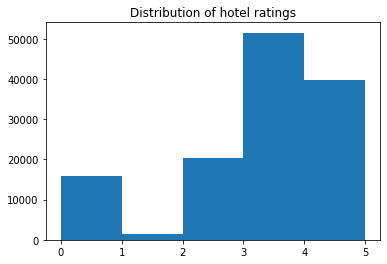

In [58]:
hotels2 = df.groupby(['prop_id']).mean()
plt.hist(hotels2['prop_starrating'], bins=5)
plt.title('Distribution of hotel ratings')
plt.show()

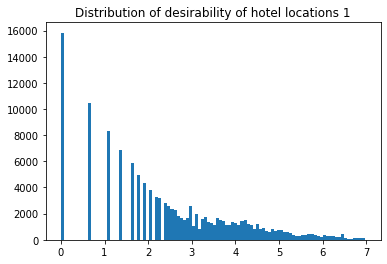

In [65]:
plt.hist(hotels2['prop_location_score1'], bins=100)
plt.title('Distribution of desirability of hotel locations 1')
plt.show()

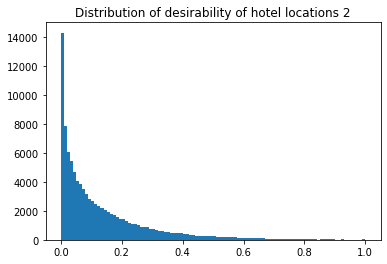

In [66]:
plt.hist(hotels2['prop_location_score2'], bins=100)
plt.title('Distribution of desirability of hotel locations 2')
plt.show()